## Dataanalyse
### Statistiske målinger for de innsamlede dataene
Oppgave 4 omfatter en statistisk analyse av to datasett: ett med luftkvalitetsmålinger og ett med værdata. Ved hjelp av Pandas og NumPy ble det beregnet sentraltendensmål som gjennomsnitt og median, samt standardavvik for ulike vær- og luftkvalitetsvariabler.

Gjennomsnittet gir en indikasjon på det generelle nivået av en variabel, mens medianen fungerer som et mer robust estimat i tilfeller der datasettet er skjevt eller inneholder ekstreme verdier. Standardavviket beskriver hvor mye observasjonene avviker fra gjennomsnittet, og er dermed nyttig for å vurdere graden av stabilitet eller volatilitet i dataene over tid.


Disse statistiske beregningene er sentrale fordi de gir et nødvendig grunnlag for å forstå strukturen, kvaliteten og egenskapene ved datasettet før mer avanserte analyser gjennomføres. Ved å beregne mål for sentraltendens, som gjennomsnitt og median, samt mål for spredning som standardavvik, kan man få innsikt i hva som er typisk for datasettet, og hvor stor variasjon det er i observasjonene. Dette er særlig viktig i miljømålinger, hvor dataverdiene ofte påvirkes av både naturlige variasjoner (som værforhold og sesongendringer) og menneskeskapte forhold (som utslipp og urbanisering).

Slike beregninger er også avgjørende for å kunne avdekke mønstre og trender. Formålet med den statistiske analysen er derfor ikke bare å oppsummere data, men også å gi en dypere forståelse av de underliggende prosessene og forholdene som påvirker miljøvariablene i datasettet.


In [1]:
import json
import pandas as pd
import sys

# Importer funksjoner for å kunne beregne statistikk
sys.path.append("../src")
from funksjoner import beregn_statistikk

# Henter inn data fra to forskjellige JSON-filer
path_df1 = "../data/df1_data.json"
path_df2 = "../data/df2_data.json"

#Forskjellige variabler i de to datasettene
tid_df1 = "date"
tid_df2 = "referenceTime"

# Leser inn data fra JSON-filer og konverterer til DataFrame
def les_data(file_path, variable, tid):
    with open(file_path, "r", encoding="utf-8") as file:
        raw_data = json.load(file)
    return pd.DataFrame({
        tid: pd.to_datetime(list(raw_data[tid].values()), unit="ms"),
        "value": list(raw_data[variable].values())
    })

In [2]:
# Leser temperaturdata og beregner statistikk
temperatur = les_data(path_df2, "mean(air_temperature P1D)", tid_df2)
stat = beregn_statistikk(temperatur, kolonne="value", tidskolonne=tid_df2)

# Skriv ut resultatene
print(f"Gjennomsnittstemperatur: {stat['gjennomsnitt']:.2f} °C")
print(f"Median: {stat['median']:.2f} °C")
print(f"Standardavvik: {stat['standardavvik']:.2f} °C")

Gjennomsnittstemperatur: 13.18 °C
Median: 14.18 °C
Standardavvik: 5.52 °C


In [3]:
luftfuktighet = les_data(path_df2, "mean(relative_humidity P1D)", tid_df2)
stat = beregn_statistikk(luftfuktighet, kolonne="value", tidskolonne=tid_df2)

print(f"Gjennomsnitt relativ luftfuktighet: {stat['gjennomsnitt']:.2f} %")
print(f"Median: {stat['median']:.2f} %")
print(f"Standardavvik: {stat['standardavvik']:.2f} %")

Gjennomsnitt relativ luftfuktighet: 63.30 %
Median: 63.00 %
Standardavvik: 16.17 %


In [4]:
nedbør = les_data(path_df2, "sum(precipitation_amount P1D)",tid_df2)
stat = beregn_statistikk(nedbør, kolonne="value", tidskolonne=tid_df2)

print(f"Gjennomsnittlig nedbør: {stat['gjennomsnitt']:.2f} mm")
print(f"Median: {stat['median']:.2f} mm")
print(f"Standardavvik: {stat['standardavvik']:.2f} mm")

Gjennomsnittlig nedbør: 2.50 mm
Median: 0.20 mm
Standardavvik: 5.06 mm


In [5]:
vindhastighet = les_data(path_df2, "mean(wind_speed P1D)",tid_df2)
stat = beregn_statistikk(vindhastighet, kolonne="value", tidskolonne=tid_df2)

print(f"Gjennomsnittlig vindhastighet: {stat['gjennomsnitt']:.2f} m/s")
print(f"Median: {stat['median']:.2f} m/s")
print(f"Standardavvik: {stat['standardavvik']:.2f} m/s")

Gjennomsnittlig vindhastighet: 2.83 m/s
Median: 2.70 m/s
Standardavvik: 0.87 m/s


In [6]:
# NB! Henter data fra df1_data.json, som er et annet datasett for luftkvalitet. Bruker fortatt den samme readingsfunksjonen.
CO = les_data(path_df1, "CO", tid_df1)
stat = beregn_statistikk(CO, kolonne="value", tidskolonne=tid_df1)

print(f"Gjennomsnitt CO: {stat['gjennomsnitt']:.2f} mg/m³")
print(f"Median: {stat['median']:.2f} mg/m³")
print(f"Standardavvik: {stat['standardavvik']:.2f} mg/m³")

Gjennomsnitt CO: 0.20 mg/m³
Median: 0.20 mg/m³
Standardavvik: 0.11 mg/m³


In [7]:
NOx = les_data(path_df1, "NOx", tid_df1)
stat = beregn_statistikk(NOx, kolonne="value", tidskolonne=tid_df1)

print(f"Gjennomsnitt NOx: {stat['gjennomsnitt']:.2f} mg/m³")
print(f"Median: {stat['median']:.2f} mg/m³")
print(f"Standardavvik: {stat['standardavvik']:.2f} mg/m³")

Gjennomsnitt NOx: 13.60 mg/m³
Median: 12.23 mg/m³
Standardavvik: 6.51 mg/m³


In [8]:
PM10 = les_data(path_df1, "PM10", tid_df1)
stat = beregn_statistikk(PM10, kolonne="value", tidskolonne=tid_df1)

print(f"Gjennomsnitt PM10: {stat['gjennomsnitt']:.2f} mg/m³")
print(f"Median: {stat['median']:.2f} mg/m³")
print(f"Standardavvik: {stat['standardavvik']:.2f} mg/m³")

Gjennomsnitt PM10: 11.31 mg/m³
Median: 10.00 mg/m³
Standardavvik: 6.64 mg/m³


In [9]:
PM2_5 = les_data(path_df1, "PM2.5", tid_df1)
stat = beregn_statistikk(PM2_5, kolonne="value", tidskolonne=tid_df1)

print(f"Gjennomsnitt PM2.5: {stat['gjennomsnitt']:.2f} mg/m³")
print(f"Median: {stat['median']:.2f} mg/m³")
print(f"Standardavvik: {stat['standardavvik']:.2f} mg/m³")

Gjennomsnitt PM2.5: 5.17 mg/m³
Median: 4.59 mg/m³
Standardavvik: 2.80 mg/m³


### Korrelasjonsanalyse for å undersøke sammenhengen mellom to variabler i datasettet

Som et første steg for å undersøke sammenhengen mellom to variabler i datasettet, ble det gjennomført en korrelasjonsanalyse. Ved hjelp av Pandas ble måledataene for hver variabel aggregert til daglige gjennomsnitt, noe som gjorde dataseriene sammenlignbare over tid. Korrelasjonskoeffisienten ble deretter brukt for å identifisere hvilke kombinasjoner av variabler som hadde høyest grad av lineær samvariasjon.

Korrelasjon er et statistisk mål som beskriver styrken og retningen på den lineære relasjonen mellom to variabler. En positiv korrelasjon innebærer at begge variabler tenderer til å øke sammen, mens en negativ korrelasjon betyr at en økning i den ene sammenfaller med en nedgang i den andre. En verdi nær null indikerer at det ikke er noen tydelig lineær sammenheng. Denne analysen er et effektivt og mye brukt verktøy for å identifisere mulige sammenhenger før man går videre til mer avanserte statistiske metoder.

In [10]:
# Funksjon for å beregne korrelasjon mellom to datasett
def beregn_korrelasjon(df1, tid1, df2, tid2):
    series1 = df1.groupby(df1[tid1].dt.date)["value"].mean()
    series2 = df2.groupby(df2[tid2].dt.date)["value"].mean()

    # Sikrer at begge serier har samme indeks (datoer)
    common_dates = series1.index.intersection(series2.index)
    aligned1 = series1.loc[common_dates]
    aligned2 = series2.loc[common_dates]
    
    mask = (~aligned1.isna()) & (~aligned2.isna())
    return aligned1[mask].corr(aligned2[mask])

In [11]:
# Beregner korrelasjon mellom temperatur og NOx
korrelasjon_1 = beregn_korrelasjon(NOx, tid_df1,vindhastighet, tid_df2)
print(f"Korrelasjon mellom vindhastighet og lokal forurensning: {korrelasjon_1:.2f}")

Korrelasjon mellom vindhastighet og lokal forurensning: -0.39


In [12]:
korrelasjon_2 = beregn_korrelasjon(PM10, tid_df1,vindhastighet, tid_df2)
print(f"Korrelasjon mellom vindhastighet og store partikler i luften: {korrelasjon_2:.2f}")

Korrelasjon mellom vindhastighet og store partikler i luften: -0.26


In [13]:
korrelasjon_3 = beregn_korrelasjon(PM10, tid_df1,nedbør, tid_df2)
print(f"Korrelasjon mellom nedbør og store partikler i luften: {korrelasjon_3:.2f}")

Korrelasjon mellom nedbør og store partikler i luften: -0.19


In [14]:
korrelasjon_4 = beregn_korrelasjon(PM2_5, tid_df1,luftfuktighet, tid_df2)
print(f"Korrelasjon mellom luftfuktighet og små partikler i luften: {korrelasjon_4:.2f}")

Korrelasjon mellom luftfuktighet og små partikler i luften: 0.25


Basert på korrelasjonsanalysen, ble det identifisert at vindhastighet og lokal luftforurensning hadde den sterkeste sammenhengen blant de undersøkte variablene. Dette paret ble derfor valgt ut for videre analyse ved hjelp av lineær regresjon, for å kvantifisere styrken i relasjonen mer presist. Resultatet av korrelasjonsanalysen dannet dermed et viktig grunnlag for videre undersøkelse av potensielle sammenhenger.

### Håndtering av skjevheter og sikring av pålitelighet i analysen

For å sikre påliteligheten i analysen og unngå skjevheter ble det tatt flere tiltak i forkant av den statistiske behandlingen. Først ble dataseriene renset for manglende verdier og ekstreme verdier som kunne påvirke resultatene uforholdsmessig mye. Dette ble gjort ved å bruke funksjoner som interpolerer manglende verdier, eller markerer ekstremverdier som NaN basert på definerte terskler.

Videre ble dataseriene aggregert til daglige gjennomsnitt for å redusere støy. Dette gjør analysen mer robust mot tilfeldige variasjoner og ekstreme måleverdier som kan oppstå innenfor et kortere tidsintervall. Ved å standardisere tidspunkt og enhet for alle variabler, ble det også enklere å gjennomføre sammenligninger og sikre at eventuelle sammenhenger faktisk reflekterer en systematisk relasjon. og ikke er et resultat av ujevn datainnsamling eller tekniske måleavvik.

Ved å kombinere disse tiltakene oppnås en mer pålitelig statistisk basis for analysen, og det reduseres risiko for feiltolkninger som følge av skjevheter, inkonsistens eller støy i datamaterialet.

### Vurdering av sammenhengen mellom vindhastighet og NOx

I forkant av visualiseringen ble det gjennomført en lineær regresjonsanalyse mellom vindhastighet og NOx-konsentrasjon, som tidligere var identifisert som det variabelparet med sterkest korrelasjon. For å vurdere hvor godt denne modellen beskriver dataene, ble forklaringsgraden R² beregnet. Denne verdien gir et mål på hvor stor andel av variasjonen i NOx (den avhengige variabelen) som kan forklares av endringer i vindhastighet (den uavhengige variabelen).

In [15]:
from scipy.stats import linregress

# Beregner gjennomsnittlig vindhastighet og NOx per dag
wind_per_day = vindhastighet.groupby(vindhastighet[tid_df2].dt.date)["value"].mean()
nox_per_day = NOx.groupby(NOx[tid_df1].dt.date)["value"].mean()

# Sikrer at begge serier har samme indeks (datoer)
common_dates = wind_per_day.index.intersection(nox_per_day.index)
wind_aligned = wind_per_day.loc[common_dates]
nox_aligned = nox_per_day.loc[common_dates]

# Fjern manglende verdier
mask = (~wind_aligned.isna()) & (~nox_aligned.isna())
x = wind_aligned[mask].values
y = nox_aligned[mask].values

# Kjør regresjon med SciPy
slope, intercept, r_value, p_value, std_err = linregress(x, y)

print(f"R² for lineær regresjon: {r_value**2:.2f}")

R² for lineær regresjon: 0.15



Den beregnede R²-verdien på 0.15 antyder at kun 15 % av variasjonen kan tilskrives vindhastighet, mens resten trolig skyldes andre faktorer eller støy i dataene.

### Visualisering av scatterplot med regresjonslinje

For å støtte den statistiske analysen og formidle resultatene på en visuell og intuitiv måte, ble det laget et scatterplot med  regresjonslinje og annotert R²-verdi. Scatterplottet viser hver daglig observasjon av vindhastighet mot tilhørende NOx-nivå, og den røde regresjonslinjen representerer den lineære tilpasningen.

Scatterplots som dette gir dermed ikke bare støtte til regresjonsmodellen, men hjelper også med å avdekke om forholdet mellom variablene er lineært, om det finnes ekstreme verdier, og hvorvidt visuelle mønstre støtter de statistiske målene.

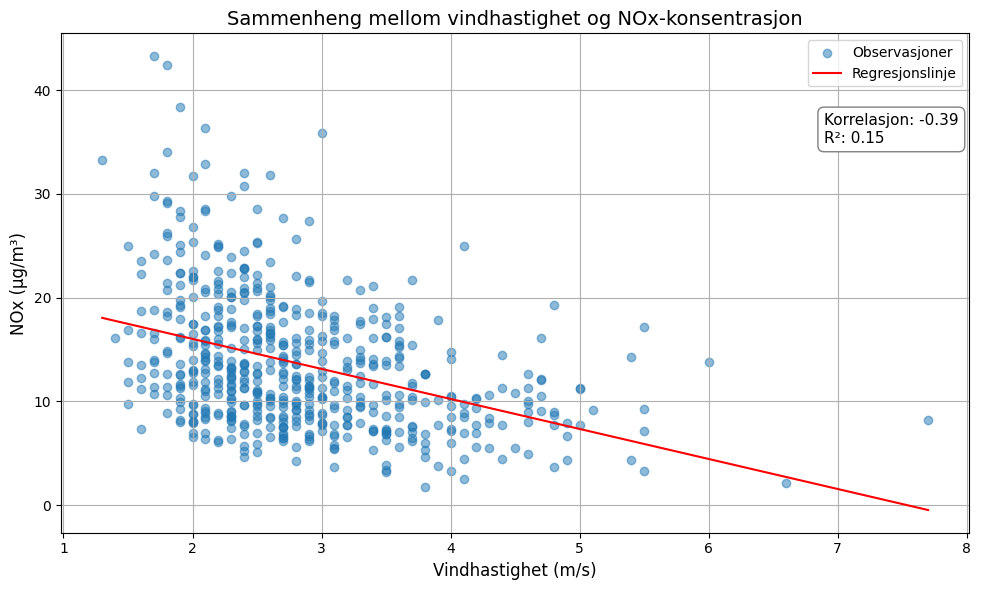

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Lag regresjonslinje-data
x_lin = np.linspace(min(x), max(x), 100)
y_lin = slope * x_lin + intercept

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.5, label="Observasjoner")
plt.plot(x_lin, y_lin, color='red', label='Regresjonslinje')

# Legg til R² og korrelasjon i grafen
tekst = f"Korrelasjon: {korrelasjon_1:.2f}\nR²: {r_value**2:.2f}"
plt.text(0.84, 0.84, tekst, transform=plt.gca().transAxes,
         fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle="round,pad=0.4", facecolor="white", edgecolor="gray"))

# Pynt grafen
plt.xlabel("Vindhastighet (m/s)", fontsize=12)
plt.ylabel("NOx (µg/m³)", fontsize=12)
plt.title("Sammenheng mellom vindhastighet og NOx-konsentrasjon", fontsize=14)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


Visualiseringen bekrefter at det finnes en svak negativ sammenheng mellom vindhastighet og NOx, noe som er i tråd med hypotesen om at høyere vindhastighet bidrar til spredning av forurensning og dermed reduserte konsentrasjoner av NOx. Samtidig fremhever plottet at observasjonene er spredt rundt regresjonslinjen, noe som støtter den lave R²-verdien og viser at modellen har begrenset forklaringskraft.

Punktfordelingen er likevel relativt spredt, og regresjonslinjen skjærer gjennom en stor sky av data – noe som bekrefter at det finnes mange andre faktorer som påvirker NOx-nivåene utover vind alene.'

Visualiseringen gir derfor et mer nyansert bilde: den bekrefter at det finnes en svak sammenheng, men også at modellen er begrenset i forklaringskraft, noe som fremgår både av lav R² og spredte datapunkter.

### Polynomregresjon

I tillegg til den lineære regresjonen ble det også gjennomført en polynomregresjon av femte grad. Hensikten med dette var å undersøke om en ikke-lineær modell kunne gi bedre tilpasning til dataene og dermed høyere forklaringsgrad (R²-verdi). Ved å tilpasse et polynom til observasjonene ønsket vi å se om modellen kunne fange opp eventuelle buede mønstre eller mer komplekse sammenhenger mellom vindhastighet og NOx-konsentrasjon.

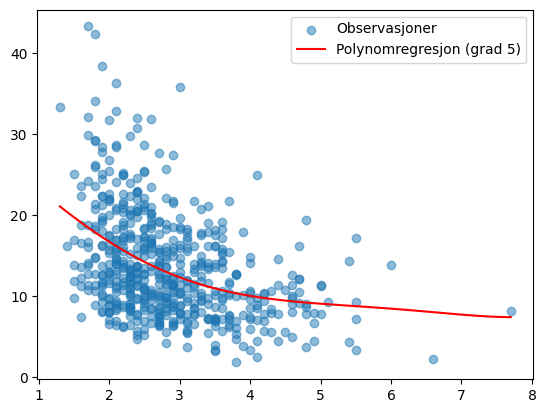

In [17]:
from numpy.polynomial.polynomial import Polynomial

# Tilpass et polynom av grad 2 (kan endres til 3, 4, osv.)
coeffs = Polynomial.fit(x, y, deg=5)

# Evaluer modellen for å få regresjonslinje
x_fit = np.linspace(min(x), max(x), 100)
y_fit = coeffs(x_fit)

# Plot
plt.scatter(x, y, alpha=0.5, label="Observasjoner")
plt.plot(x_fit, y_fit, color="red", label="Polynomregresjon (grad 5)")
plt.legend()
plt.show()


In [18]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import Polynomial

# Anta at du allerede har x og y
# 1. Tilpass polynom
model = Polynomial.fit(x, y, deg=2)  # deg=2 er andregradspolynom

# 2. Evaluer modellen på de opprinnelige x-verdiene
y_pred = model(x)

# 3. Beregn R² manuelt
ss_res = np.sum((y - y_pred) ** 2)
ss_tot = np.sum((y - np.mean(y)) ** 2)
r2 = 1 - (ss_res / ss_tot)

# 4. Skriv ut R²
print(f"R² for polynomregresjon: {r2:.2f}")
print(f"R² for lineær regresjon: {r_value**2:.2f}")

R² for polynomregresjon: 0.17
R² for lineær regresjon: 0.15


Resultatene viste en svak økning i R²-verdien sammenlignet med den lineære modellen, men forbedringen var marginal og modellen ble samtidig mer kompleks og mindre tolkbar. På bakgrunn av dette ble den lineære modellen vurdert som tilstrekkelig for denne analysen, ettersom den gir en enklere og mer robust beskrivelse av sammenhengen, til tross for lav forklaringskraft.